In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
df_bank = pd.read_csv('bank-full.csv', sep=';')

## Exploratory Data Analysis

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df_bank.shape

(45211, 17)

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df_bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [8]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Visualization

## Visualisasi beberapa data berdasarkan umur nasabah

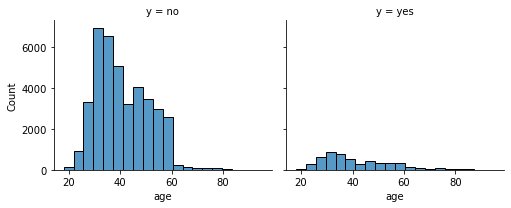

In [9]:
hist=sns.FacetGrid(data=df_bank,col='y',height=3,aspect=1.2)
hist.map(sns.histplot,'age',bins=20)
plt.show()

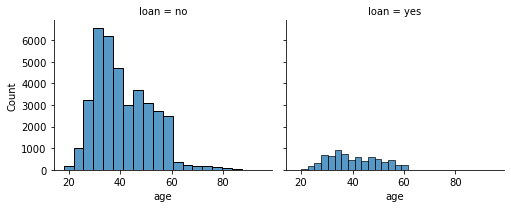

In [10]:
hist=sns.FacetGrid(data=df_bank,col='loan',height=3,aspect=1.2)
hist.map(sns.histplot,'age',bins=20)
plt.show()

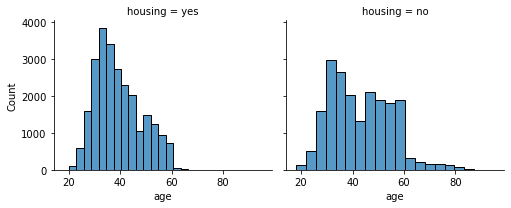

In [11]:
hist=sns.FacetGrid(data=df_bank,col='housing',height=3,aspect=1.2)
hist.map(sns.histplot,'age',bins=20)
plt.show()

## Visualisasi untuk persentase pekerjaan nasabah

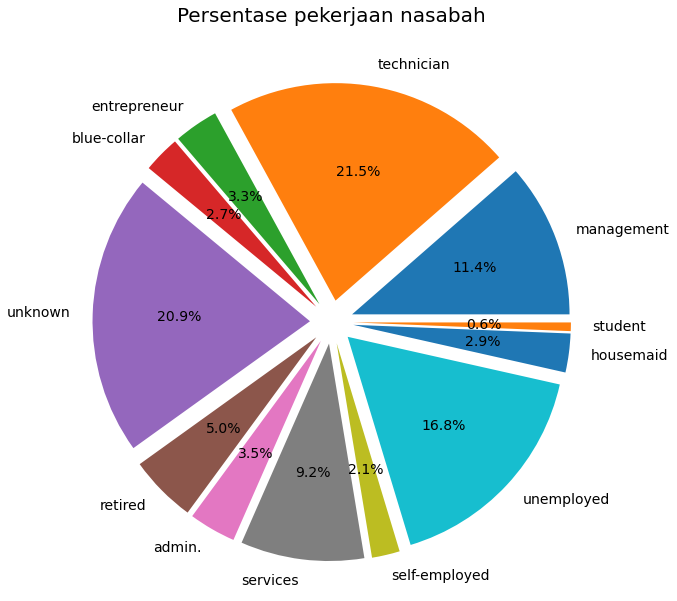

In [12]:
lables = df_bank['job'].unique()
sizes = df_bank.groupby(['job']).size()
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor('lightblue')
plt.title('Persentase pekerjaan nasabah\n', size = 20)
plot = plt.pie(sizes, labels=lables, autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], textprops={'fontsize':14, 'color':'black'})
plt.show()

## Visualisasi untuk persentase marital nasabah

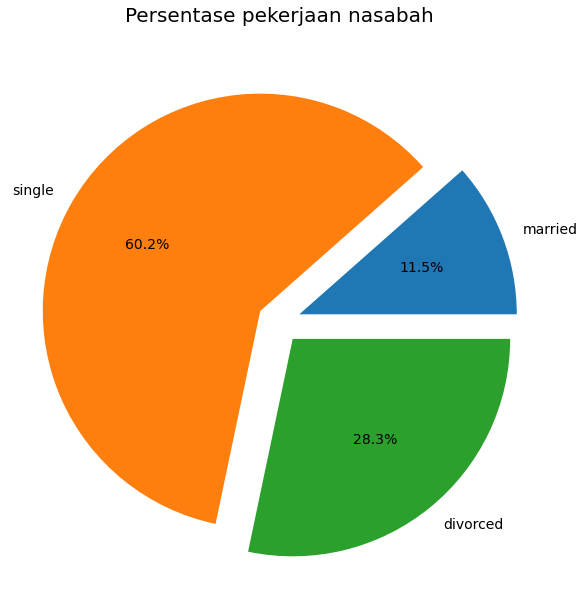

In [13]:
lables = df_bank['marital'].unique()
sizes = df_bank.groupby(['marital']).size()
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor('lightblue')
plt.title('Persentase pekerjaan nasabah\n', size = 20)
plot = plt.pie(sizes, labels=lables, autopct='%1.1f%%',explode=[0.1,0.1,0.1], textprops={'fontsize':14, 'color':'black'})
plt.show()

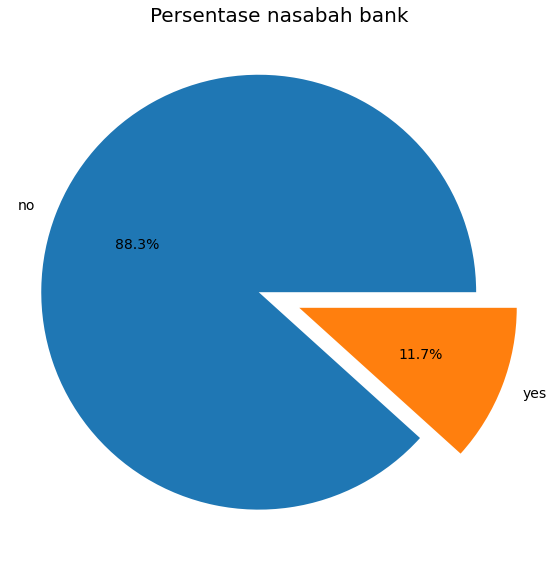

In [14]:
lables = df_bank['y'].unique()
sizes = df_bank.groupby(['y']).size()
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor('lightblue')
plt.title('Persentase nasabah bank', size = 20)
plot = plt.pie(sizes, labels=lables, autopct='%1.1f%%',explode=[0.1,0.1], textprops={'fontsize':14, 'color':'black'})
plt.show()

# Data Preparation for Model

In [15]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [16]:
le = preprocessing.LabelEncoder()

In [17]:
df_bank[['job','marital','education','default','balance','housing','loan','contact','month','poutcome','y']] = df_bank[['job',
                                                                                                              'marital',
                                                                                                              'education',
                                                                                                              'default',
                                                                                                              'balance',
                                                                                                              'housing',
                                                                                                              'loan',
                                                                                                              'contact',
                                                                                                              'month',
                                                                                                              'poutcome',
                                                                                                              'y']].apply(le.fit_transform)


In [18]:
x = df_bank.drop(['y'], axis = 1)
y = pd.DataFrame(df_bank['y'])

print(x)
print(y)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     3036        1     0        2   
1       44    9        2          1        0      945        1     0        2   
2       33    2        1          1        0      918        1     1        2   
3       47    1        1          3        0     2420        1     0        2   
4       33   11        2          3        0      917        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0     1741        0     0        0   
45207   71    5        0          0        0     2639        0     0        0   
45208   72    5        1          1        0     5455        0     0        0   
45209   57    1        1          1        0     1584        0     0        1   
45210   37    2        1          1        0     3779        0     0        0   

       day  month  duration

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Model Machine Learning

## 1. Logistic Regression

In [20]:
model = LogisticRegression(solver = 'liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\adjie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


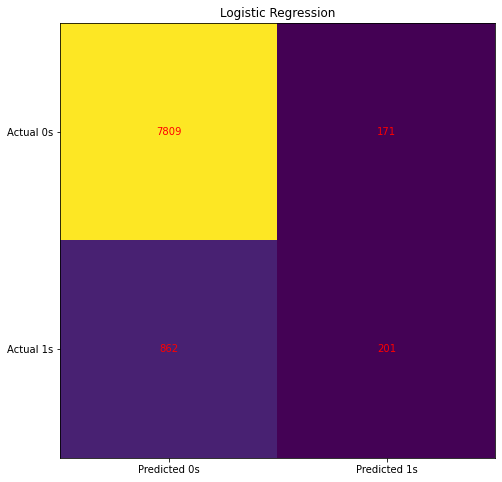

In [21]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Logistic Regression')
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range (2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [22]:
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.54      0.19      0.28      1063

    accuracy                           0.89      9043
   macro avg       0.72      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043

Accuracy: 0.8857679973460135


## 2. K-Nearest Neighbors

In [23]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\adjie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


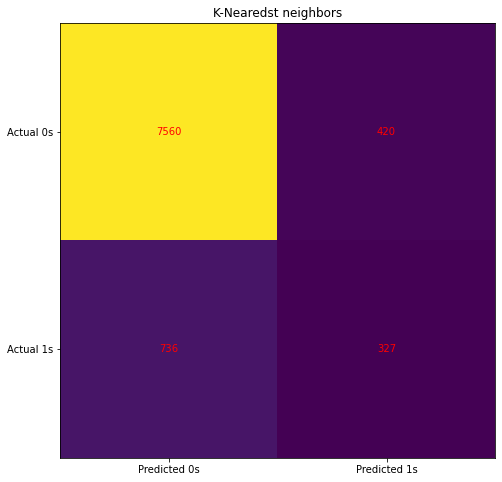

In [24]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('K-Nearedst neighbors')
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range (2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [25]:
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7980
           1       0.44      0.31      0.36      1063

    accuracy                           0.87      9043
   macro avg       0.67      0.63      0.65      9043
weighted avg       0.86      0.87      0.86      9043

Accuracy: 0.8721663164878912


## 3. SVM (Support Vector Machine)

In [26]:
model = LinearSVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\adjie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\adjie\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


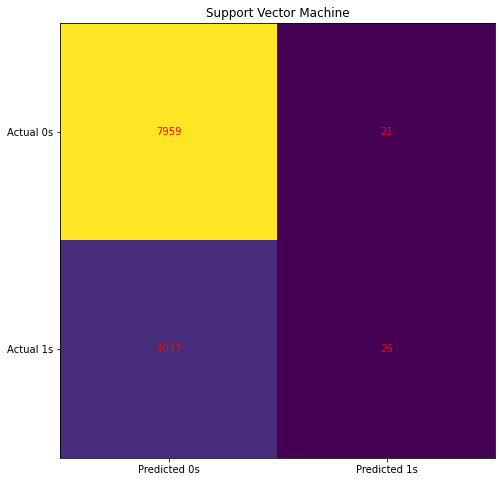

In [29]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Support Vector Machine')
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range (2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [28]:
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7980
           1       0.55      0.02      0.05      1063

    accuracy                           0.88      9043
   macro avg       0.72      0.51      0.49      9043
weighted avg       0.85      0.88      0.83      9043

Accuracy: 0.8830034280659074


## 4. Decision Tree

In [39]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

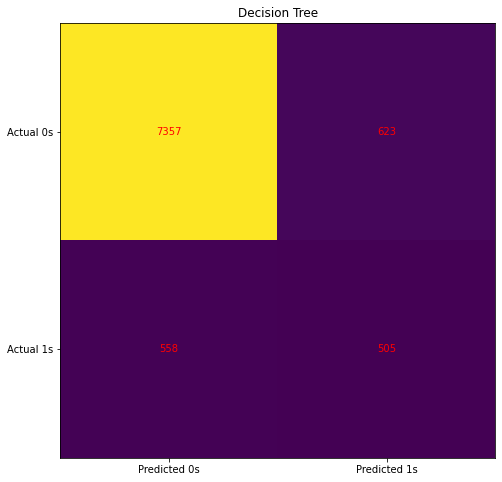

In [40]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Decision Tree')
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range (2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [41]:
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7980
           1       0.45      0.48      0.46      1063

    accuracy                           0.87      9043
   macro avg       0.69      0.70      0.69      9043
weighted avg       0.87      0.87      0.87      9043

Accuracy: 0.8694017472077851


## 5. Random Forest

In [43]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\adjie\AppData\Local\Temp/ipykernel_36364/2886908980.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


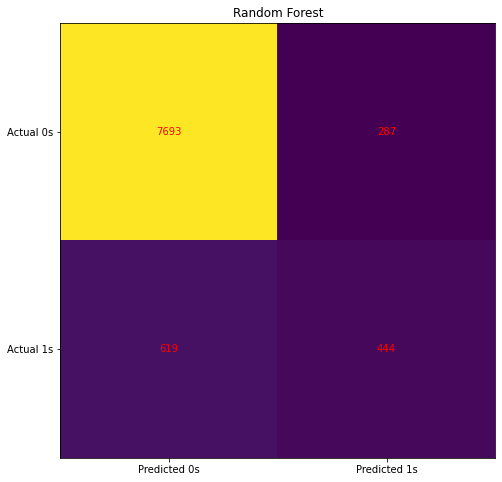

In [44]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Random Forest')
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range (2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [45]:
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7980
           1       0.61      0.42      0.49      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

Accuracy: 0.8998120092889528


## 6. Naive Bayes

In [46]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\adjie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


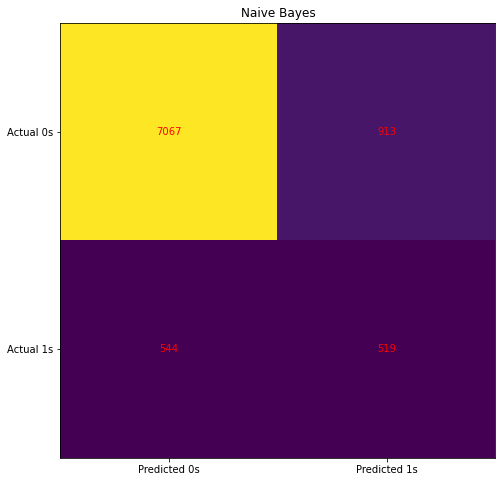

In [48]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Naive Bayes')
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range (2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [49]:
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7980
           1       0.36      0.49      0.42      1063

    accuracy                           0.84      9043
   macro avg       0.65      0.69      0.66      9043
weighted avg       0.86      0.84      0.85      9043

Accuracy: 0.838880902355413
